## Алгоритм PageRank

Пусть дан граф $G = (V, E)$ и число $\alpha \in (0, 1)$ Построим по этому графу марковскую цепь c фазовым пространством $V$ и со следующими переходными вероятностями:
\begin{equation}
P(X_{n+1} = u \text{ | } X_{n} = v) = \begin{cases}
\frac{\alpha}{deg(v)} + \frac{1 - \alpha}{|V|}, & (v, u) \in E \\
\frac{1 - \alpha}{|V|}, & (v, u) \notin E
\end{cases}
\end{equation}
Начальное распределени считаем следующим $P(X_0 = u) = 1 / |V|$.
Стационарное распределение $\Pi$ этой марковской цепи называется вектором значениий PageRank для множества вершин $V$. Стационарное распределение будем искать итеративным методом, последовательно применяя $\Pi_{n+1} = A * \Pi_{n}$, где $A$ -- матрица переходных вероятностей, пока $||\Pi_n - \Pi_{n+1}|| \geq \varepsilon$. Вот реализация алгоритма:

In [3]:
%matplotlib inline
import numpy as np

alpha = 0.85

def delta(arr1, arr2):
    ans = 0
    for i in range(0, len(arr1)):
        ans = max(ans, abs(arr1[i] - arr2[i]))
    return ans

def page_rank(links, epsilon = 0.001):
    """
    Input:
        links      |E|*2 numpy.array, webgraph G = (V, E)
        epsilon    tolerance
    Output:
        pr         |V|*1 numpy.array pagerank of webgraph
    """
    n = max(map(lambda link: max(link[0], link[1]), links)) + 1
    cond_probability = [[0 for j in range(0, n)] for i in range(0, n)]
    g = [[] for i in range(0, n)]
    for link in links:
        u = link[0]
        v = link[1]
        g[u].append(v)
    for i in range(0, n):
        for j in g[i]:
            cond_probability[i][j] += alpha / len(g[i])
        for j in range(0, n):
            if (len(g[i]) == 0):
                cond_probability[i][j] += 1 / n
            else:
                cond_probability[i][j] += (1 - alpha) / n
    print(cond_probability)
    cond_probability = np.matrix(cond_probability).T
    prev_distribution = np.matrix([[1/n for i in range(0, n)]]).T
    distribution = cond_probability * prev_distribution
    while delta(prev_distribution, distribution) >= epsilon:
        prev_distribution = distribution
        distribution = cond_probability * prev_distribution
    return distribution

## Примеры работы алгоритма
Приведём примеры работы алгоритма на некоторых графах. Для отображения графов используем библиотеку networkx

[[0.021428571428571432, 0.8714285714285714, 0.021428571428571432, 0.021428571428571432, 0.021428571428571432, 0.021428571428571432, 0.021428571428571432], [0.23392857142857143, 0.23392857142857143, 0.23392857142857143, 0.23392857142857143, 0.021428571428571432, 0.021428571428571432, 0.021428571428571432], [0.021428571428571432, 0.8714285714285714, 0.021428571428571432, 0.021428571428571432, 0.021428571428571432, 0.021428571428571432, 0.021428571428571432], [0.021428571428571432, 0.8714285714285714, 0.021428571428571432, 0.021428571428571432, 0.021428571428571432, 0.021428571428571432, 0.021428571428571432], [0.021428571428571432, 0.30476190476190473, 0.021428571428571432, 0.021428571428571432, 0.021428571428571432, 0.30476190476190473, 0.30476190476190473], [0.021428571428571432, 0.021428571428571432, 0.021428571428571432, 0.021428571428571432, 0.8714285714285714, 0.021428571428571432, 0.021428571428571432], [0.021428571428571432, 0.021428571428571432, 0.021428571428571432, 0.021428571

/home/andrew/.local/lib/python3.4/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/andrew/.local/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


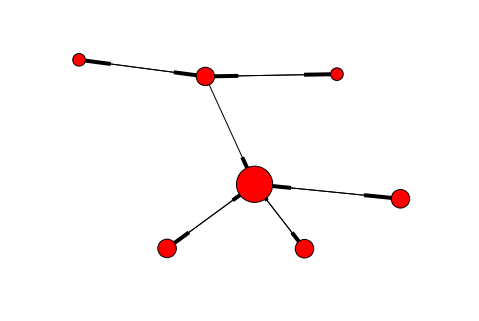

[[0.2, 0.2, 0.2, 0.2, 0.2], [0.88, 0.030000000000000006, 0.030000000000000006, 0.030000000000000006, 0.030000000000000006], [0.88, 0.030000000000000006, 0.030000000000000006, 0.030000000000000006, 0.030000000000000006], [0.88, 0.030000000000000006, 0.030000000000000006, 0.030000000000000006, 0.030000000000000006], [0.88, 0.030000000000000006, 0.030000000000000006, 0.030000000000000006, 0.030000000000000006]]


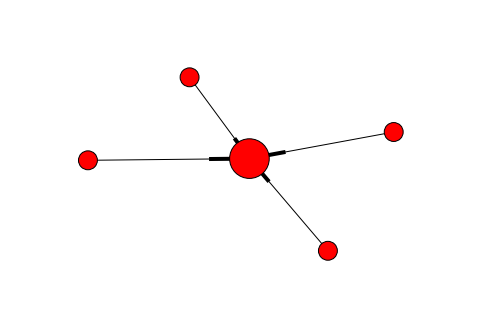

[[0.025000000000000005, 0.875, 0.025000000000000005, 0.025000000000000005, 0.025000000000000005, 0.025000000000000005], [0.025000000000000005, 0.025000000000000005, 0.875, 0.025000000000000005, 0.025000000000000005, 0.025000000000000005], [0.025000000000000005, 0.025000000000000005, 0.025000000000000005, 0.875, 0.025000000000000005, 0.025000000000000005], [0.025000000000000005, 0.025000000000000005, 0.025000000000000005, 0.025000000000000005, 0.875, 0.025000000000000005], [0.025000000000000005, 0.025000000000000005, 0.025000000000000005, 0.025000000000000005, 0.025000000000000005, 0.875], [0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666]]


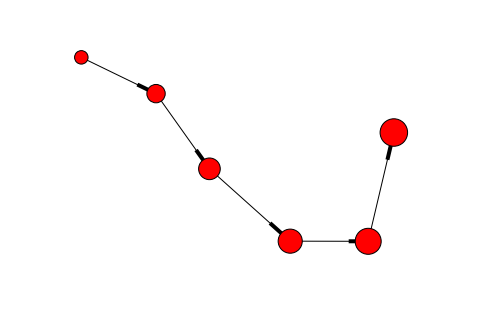

[[0.025000000000000005, 0.875, 0.025000000000000005, 0.025000000000000005, 0.025000000000000005, 0.025000000000000005], [0.025000000000000005, 0.025000000000000005, 0.875, 0.025000000000000005, 0.025000000000000005, 0.025000000000000005], [0.025000000000000005, 0.025000000000000005, 0.025000000000000005, 0.875, 0.025000000000000005, 0.025000000000000005], [0.025000000000000005, 0.025000000000000005, 0.025000000000000005, 0.025000000000000005, 0.875, 0.025000000000000005], [0.025000000000000005, 0.025000000000000005, 0.025000000000000005, 0.025000000000000005, 0.025000000000000005, 0.875], [0.875, 0.025000000000000005, 0.025000000000000005, 0.025000000000000005, 0.025000000000000005, 0.025000000000000005]]


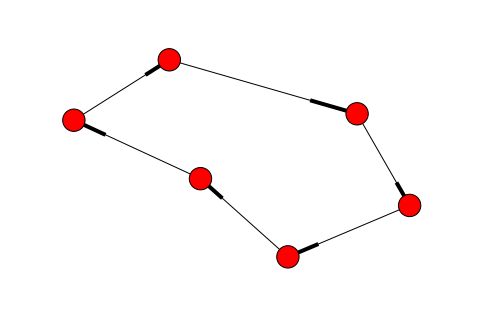

[[0.018750000000000003, 0.018750000000000003, 0.86875, 0.018750000000000003, 0.018750000000000003, 0.018750000000000003, 0.018750000000000003, 0.018750000000000003], [0.018750000000000003, 0.018750000000000003, 0.86875, 0.018750000000000003, 0.018750000000000003, 0.018750000000000003, 0.018750000000000003, 0.018750000000000003], [0.018750000000000003, 0.018750000000000003, 0.018750000000000003, 0.86875, 0.018750000000000003, 0.018750000000000003, 0.018750000000000003, 0.018750000000000003], [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125], [0.018750000000000003, 0.018750000000000003, 0.018750000000000003, 0.018750000000000003, 0.018750000000000003, 0.018750000000000003, 0.86875, 0.018750000000000003], [0.018750000000000003, 0.018750000000000003, 0.018750000000000003, 0.018750000000000003, 0.018750000000000003, 0.018750000000000003, 0.86875, 0.018750000000000003], [0.018750000000000003, 0.018750000000000003, 0.018750000000000003, 0.86875, 0.018750000000000003, 0.0187500000000000

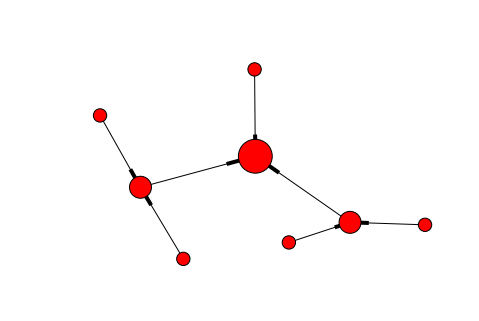

In [6]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_graph(graph, page_rank):
    nodes = set([n1 for [n1, n2] in graph] + [n2 for [n1, n2] in graph])
    G=nx.DiGraph()
    for node in nodes:
        G.add_node(node)
    for edge in graph:
        G.add_edge(edge[0], edge[1])
    nx.draw(G, node_size = [3000 * x for x in page_rank], arrows = True)
    plt.show()

def draw(links):
    draw_graph(links, page_rank(links))
    
links = [[0, 1], [2, 1], [3, 1], [1, 0], [1, 2], [1, 1], [1, 3], [4, 5], [5, 4], [4, 6], [6, 4], [4, 1]]
draw(links)

links = [[1, 0], [2, 0], [3, 0], [4, 0]]
draw(links)

links = [[0, 1], [1, 2], [2, 3], [3, 4], [4, 5]]
draw(links)

links = [[0, 1], [1, 2], [2, 3], [3, 4], [4, 5], [5, 0]]
draw(links)

links = [[0, 2], [1, 2], [2, 3], [4, 6], [5, 6], [6, 3], [7, 3]]
draw(links)

## Тестирование

In [5]:
links = [[1, 1], [3, 0], [0, 2], [2, 1], [2, 0], [1, 2]]
print(page_rank(links))

[[0.037500000000000006, 0.037500000000000006, 0.8875, 0.037500000000000006], [0.037500000000000006, 0.4625, 0.4625, 0.037500000000000006], [0.4625, 0.4625, 0.037500000000000006, 0.037500000000000006], [0.8875, 0.037500000000000006, 0.037500000000000006, 0.037500000000000006]]
[[ 0.23220644]
 [ 0.34812912]
 [ 0.38216444]
 [ 0.0375    ]]


In [6]:
import sys
sys.path.append('..')
from test_5 import test

for n in range(3, 11):
    test(page_rank, n, 100)

for n in range(3, 11):
    test(page_rank, n, 100, epsilon=0.00001)

for n in range(100, 301, 100):
    test(page_rank, n, 10, epsilon=0.00001)

Error test 0
Links:
[[0 2]]
Correct answer: [[ 0.25977833  0.25977833  0.48044333]]
You answer: [[ 0.08757357]
 [ 0.33333333]
 [ 0.57909309]]
Error test 0
Links:
[[1 1]
 [3 0]
 [0 2]
 [2 1]
 [2 0]
 [1 2]]
Correct answer: [[ 0.23220644  0.34812912  0.38216444  0.0375    ]]
You answer: [[ 0.30181414]
 [ 0.25208781]
 [ 0.38068397]
 [ 0.06541408]]
Error test 1
Links:
[[3 2]
 [4 1]
 [4 4]
 [0 0]
 [0 3]
 [3 3]
 [2 0]
 [4 0]
 [2 4]
 [0 4]
 [2 1]
 [3 4]
 [4 3]
 [1 3]
 [1 1]
 [4 2]
 [1 2]
 [3 0]
 [0 2]
 [2 3]
 [1 4]
 [3 1]
 [1 0]
 [2 2]]
Correct answer: [[ 0.2088766   0.16449359  0.2088766   0.2088766   0.2088766 ]]
You answer: [[ 0.2088766 ]
 [ 0.16449359]
 [ 0.2088766 ]
 [ 0.2088766 ]
 [ 0.2088766 ]]
Error test 0
Links:
[[5 2]
 [4 3]
 [0 2]
 [4 5]
 [0 3]
 [3 3]
 [5 4]
 [3 2]
 [1 5]]
Correct answer: [[ 0.06503652  0.06503652  0.28234864  0.26561335  0.14187566  0.18008932]]
You answer: [[ 0.03488376]
 [ 0.04348254]
 [ 0.6674504 ]
 [ 0.09557204]
 [ 0.07006436]
 [ 0.0885469 ]]
Error test 0
Links